In [1]:
import matplotlib.pyplot as plt
from Functions.connection.connection import *
from Functions.Models.Logistic_regression import *
from Functions.Models.Random_forest import *
from Functions.Models.xgboost import *
from Functions.Models.evaluation import *
from Functions.Pipelines.pipeline_NLP import *


2023-05-28 22:37:59.869192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 22:38:00.544288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
alertP1=connection("credentials.csv")
#alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")


Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
601


/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
data = pre_process(alertP1)

/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

# XGBOOST

In [4]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text_caveman','clean_text','LDA_text','tf_idf text']#'word2vec_text'
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

In [5]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.56,0.83,0.96,0.83,0.90
1,Cohen's Kappa,0.64,0.83,0.86,0.89,0.94


In [6]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.56,0.69,0.91,0.70,0.71
1,Cohen's Kappa,0.64,0.70,0.81,0.76,0.76


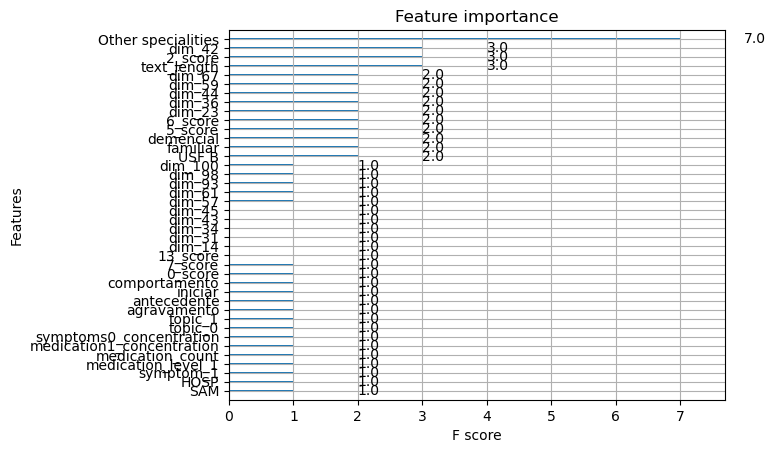

In [16]:
from xgboost import plot_importance

# Plot the feature importance scores
plot_importance(model_score)
plt.show()

## combiantions

In [7]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text_caveman','clean_text','LDA_text','tf_idf text']#'word2vec_text'
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
features

Index(['text_length', 'outside area', 'SAM', 'SON', 'unknown',
       'Other specialities', '2', '3+', 'HOSP', 'UCSP',
       ...
       'geral', 'hta', 'medicar', 'medicina', 'mg', 'quadro', 'se', 'tac',
       'ter', 'tremor'],
      dtype='object', length=173)

In [23]:
non_Nlp=features[0:14]
caveman_features=features[14:36]
LDA_features=features[36:39]
#chi_squared_features=features[39:110]
bertfeatures=features[39:53]#features[110:124]
Word2vec_features=features[53:153]#features[124:]
tfidf_features=features[153:]

from itertools import compress, product
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
  #This fonctions will be used to have every combinations of features for the model
def combinations(items):
      return ( list(set(compress(items,mask))) for mask in product(*[[0,1]]*len(items)) )


def lgbm(all_columns,y):
      new_x=X[all_columns]
      y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(new_x,y)
      thresholds = np.linspace(0, 1, 100)
       # Cohen's Kappa
      kappas = [cohen_kappa_score(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
      kappa_threshold = thresholds[np.argmax(kappas)]
      kappa_y_pred_binary = (y_pred_test >= kappa_threshold).astype(int)
      kappa_recall = recall_score(y_test, kappa_y_pred_binary)
      kappa_precision = precision_score(y_test, kappa_y_pred_binary)
      return(round(kappa_recall, 2),round(kappa_precision, 2))

d = pd.DataFrame(columns=["Features_used","recall","precision"])

all_columns = [non_Nlp,caveman_features,LDA_features,bertfeatures,Word2vec_features,tfidf_features] #all_columns = [non_Nlp,caveman_features,LDA_features,chi_squared_features,bertfeatures,Word2vec_features]
  #Iterate over every combinations of features and train the model,
  #get the MAE and append it with the features used in the dataframe
combi_col = list(combinations(np.arange(start=0, stop=len(all_columns))))[1:] #starting from index 1 to drop empty list
group_names = ['non_Nlp', 'caveman_features', 'LDA_features', 'bertfeatures', 'Word2vec_features','tfidf features']#group_names = ['non_Nlp', 'caveman_features', 'LDA_features', 'chi_squared_features', 'bertfeatures', 'Word2vec_features']

for columns in combi_col:
    selected_columns_group = [group_names[i] for i in columns]
    selected_columns = [all_columns[i] for i in columns]
    flattened_columns = [col for sublist in selected_columns for col in sublist]  # Flatten the list
    recall,precision = lgbm(flattened_columns, y)
    d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)

d['Rank'] = d['recall'].rank(ascending=0).astype(int)
d = d.sort_values(["recall"], ascending=False)
d = d[["Rank", "Features_used", "recall","precision"]]

/tmp/ipykernel_3888935/3103569531.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3888935/3103569531.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3888935/3103569531.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3888935/3103569531.py:42: FutureWarning: The frame.append method is deprecated 

In [25]:
# Save the dataframe to a CSV file
d.to_csv('results_tfidf.csv', index=False)

In [24]:
d

,Rank,Features_used,recall,precision
21,1,"caveman_features,bertfeatures,Word2vec_features",0.91,0.70
30,2,"caveman_features,LDA_features,bertfeatures,Wor...",0.90,0.71
29,2,"caveman_features,LDA_features,bertfeatures,Wor...",0.90,0.71
12,4,"LDA_features,bertfeatures,tfidf features",0.89,0.69
22,4,"caveman_features,bertfeatures,Word2vec_feature...",0.89,0.69
...,...,...,...,...
31,59,non_Nlp,0.79,0.78
57,60,"non_Nlp,caveman_features,LDA_features,Word2vec...",0.78,0.78
58,60,"non_Nlp,caveman_features,LDA_features,Word2vec...",0.78,0.78
40,62,"non_Nlp,LDA_features,tfidf features",0.75,0.76
